In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
kraj_okres = pd.read_csv('covid_cz/kraj-okres-nakazeni-vyleceni-umrti.csv')
kraj_okres.head()

,datum,kraj_nuts_kod,okres_lau_kod,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti
0,2020-03-01,CZ010,CZ0100,2,0,0
1,2020-03-01,CZ020,CZ020A,0,0,0
2,2020-03-01,CZ020,CZ020B,0,0,0
3,2020-03-01,CZ020,CZ020C,0,0,0
4,2020-03-01,CZ020,CZ0201,0,0,0


načítanie datasetu pomocou príkazu read_csv z knižnice pandas. Dataset obsahuje záznamy o počte nakazených, vyliečených a zomrelích pre okresy v jednotlivých dňoch.

In [3]:
kraj_okres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   datum                         20097 non-null  object
 1   kraj_nuts_kod                 20097 non-null  object
 2   okres_lau_kod                 20097 non-null  object
 3   kumulativni_pocet_nakazenych  20097 non-null  int64 
 4   kumulativni_pocet_vylecenych  20097 non-null  int64 
 5   kumulativni_pocet_umrti       20097 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 942.2+ KB


Pomocou príkazu info sme zistili informácie o tomto datasete, atributy datum, kraj_nuts_kod a okres_lau_kod sú typu object. kumulativni_pocet_nakazenych, kumulativni_pocet_vylecenych a kumulativni_pocet_umrti sú typu int. Počet záznamov je 20097 a nie sú medzi nimi žiadne chýbajúce hodnoty.


In [4]:
kraj_okres.describe()

,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti
count,20097.000000,20097.000000,20097.000000
mean,727.774046,503.500075,9.876549
std,2318.119731,1778.954406,27.493207
min,0.000000,0.000000,0.000000
25%,32.000000,19.000000,0.000000
50%,87.000000,69.000000,1.000000
75%,377.000000,265.000000,6.000000
max,53301.000000,48673.000000,626.000000


Pomocou príkazu describe
sme sa pozreli na jednotlive vlastnosti ako napr. priemer, štandartná odchylka, minimum, maximum, 25% kvantil, 50% a 75% kvantil.


In [5]:
kraj_okres.describe(include=['object'], exclude=['int64'])

,datum,kraj_nuts_kod,okres_lau_kod
count,20097,20097,20097
unique,261,14,77
top,2020-04-17,CZ020,CZ0805
freq,77,3132,261


Pozrieme sa na počet jedinečných hodnôt.  Najčastejšie sa vyskytujúce hodnoty a ich počet

In [6]:
kraj_okres.isnull().sum()

datum                           0
kraj_nuts_kod                   0
okres_lau_kod                   0
kumulativni_pocet_nakazenych    0
kumulativni_pocet_vylecenych    0
kumulativni_pocet_umrti         0
dtype: int64

Skontrolujeme chýbajúce hodnoty pomocou príkazu isnull. Po zadaní príkazu môžeme vidieť, že nie sú žiadne chýbajúce hodnoty.


In [7]:
kraj_okres['kraj_nuts_kod'].unique()

array(['CZ010', 'CZ020', 'CZ031', 'CZ032', 'CZ041', 'CZ042', 'CZ051',
       'CZ052', 'CZ053', 'CZ063', 'CZ064', 'CZ071', 'CZ072', 'CZ080'],
      dtype=object)

Pozrieme sa, koľko jedinečných krajov sa nachádza v datasete.


In [8]:
kraj_okres['kraj_nuts_kod'].value_counts()

CZ020    3132
CZ042    1827
CZ064    1827
CZ031    1827
CZ032    1827
CZ080    1566
CZ052    1305
CZ063    1305
CZ071    1305
CZ051    1044
CZ053    1044
CZ072    1044
CZ041     783
CZ010     261
Name: kraj_nuts_kod, dtype: int64

Následne zistíme zastúpenie jednotlivých krajov v datasete. Vidíme, že najčastejšie zastúpený je kraj s kódom CZ020 v počte 3132


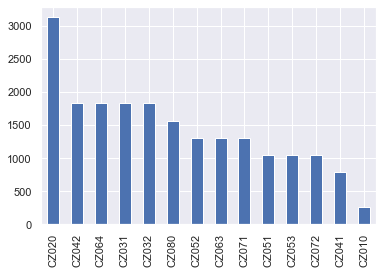

In [9]:
kraj_okres['kraj_nuts_kod'].value_counts().plot.bar()

Jednotlivé hodnoty si vyzualizujeme pomocou bar plotu, ktorý je pre toto zobrazenie asi najvhodnejší


In [10]:
kraj_okres['okres_lau_kod'].unique()

array(['CZ0100', 'CZ020A', 'CZ020B', 'CZ020C', 'CZ0201', 'CZ0202',
       'CZ0203', 'CZ0204', 'CZ0205', 'CZ0206', 'CZ0207', 'CZ0208',
       'CZ0209', 'CZ0311', 'CZ0312', 'CZ0313', 'CZ0314', 'CZ0315',
       'CZ0316', 'CZ0317', 'CZ0321', 'CZ0322', 'CZ0323', 'CZ0324',
       'CZ0325', 'CZ0326', 'CZ0327', 'CZ0411', 'CZ0412', 'CZ0413',
       'CZ0421', 'CZ0422', 'CZ0423', 'CZ0424', 'CZ0425', 'CZ0426',
       'CZ0427', 'CZ0511', 'CZ0512', 'CZ0513', 'CZ0514', 'CZ0521',
       'CZ0522', 'CZ0523', 'CZ0524', 'CZ0525', 'CZ0531', 'CZ0532',
       'CZ0533', 'CZ0534', 'CZ0631', 'CZ0632', 'CZ0633', 'CZ0634',
       'CZ0635', 'CZ0641', 'CZ0642', 'CZ0643', 'CZ0644', 'CZ0645',
       'CZ0646', 'CZ0647', 'CZ0711', 'CZ0712', 'CZ0713', 'CZ0714',
       'CZ0715', 'CZ0721', 'CZ0722', 'CZ0723', 'CZ0724', 'CZ0801',
       'CZ0802', 'CZ0803', 'CZ0804', 'CZ0805', 'CZ0806'], dtype=object)

Pozrieme sa na unikátne záznamy jednotlivých okresov.

In [11]:
kraj_okres['okres_lau_kod'].value_counts()

CZ0805    261
CZ020C    261
CZ0427    261
CZ0522    261
CZ0315    261
         ... 
CZ0513    261
CZ0314    261
CZ0723    261
CZ0642    261
CZ0531    261
Name: okres_lau_kod, Length: 77, dtype: int64

Vypíšeme si počty záznamov pre jednotlivé okresy. Môžeme si všimnúť, že v datasete sa nachádza 77 okresov.


In [12]:
nakazeny_dokopy = kraj_okres.groupby('datum')['kumulativni_pocet_nakazenych'].sum()
nakazeny_dokopy

datum
2020-03-01         3
2020-03-02         3
2020-03-03         4
2020-03-04         4
2020-03-05         7
               ...  
2020-11-12    434875
2020-11-13    442191
2020-11-14    446368
2020-11-15    448246
2020-11-16    453569
Name: kumulativni_pocet_nakazenych, Length: 261, dtype: int64

Vytvoríme si zoznam počtu nakazených ľudí pre jednotlivé dni, údaje pre jednotlivé dni zoskupíme pomocou príkazu groupby


In [13]:
vylieceny_dokopy = kraj_okres.groupby('datum')['kumulativni_pocet_vylecenych'].sum()
vylieceny_dokopy

datum
2020-03-01         0
2020-03-02         0
2020-03-03         0
2020-03-04         0
2020-03-05         0
               ...  
2020-11-12    343052
2020-11-13    356157
2020-11-14    368068
2020-11-15    379220
2020-11-16    389182
Name: kumulativni_pocet_vylecenych, Length: 261, dtype: int64

Rovnako si vypíšeme aj počet vyliečených, pre jednotlivé dni

In [14]:
umrti_dokopy = kraj_okres.groupby('datum')['kumulativni_pocet_umrti'].sum()
umrti_dokopy

datum
2020-03-01       0
2020-03-02       0
2020-03-03       0
2020-03-04       0
2020-03-05       0
              ... 
2020-11-12    5948
2020-11-13    6122
2020-11-14    6299
2020-11-15    6446
2020-11-16    6603
Name: kumulativni_pocet_umrti, Length: 261, dtype: int64

Tak isto vypočítame aj počet úmrti, prislúchajúci danému dňu.

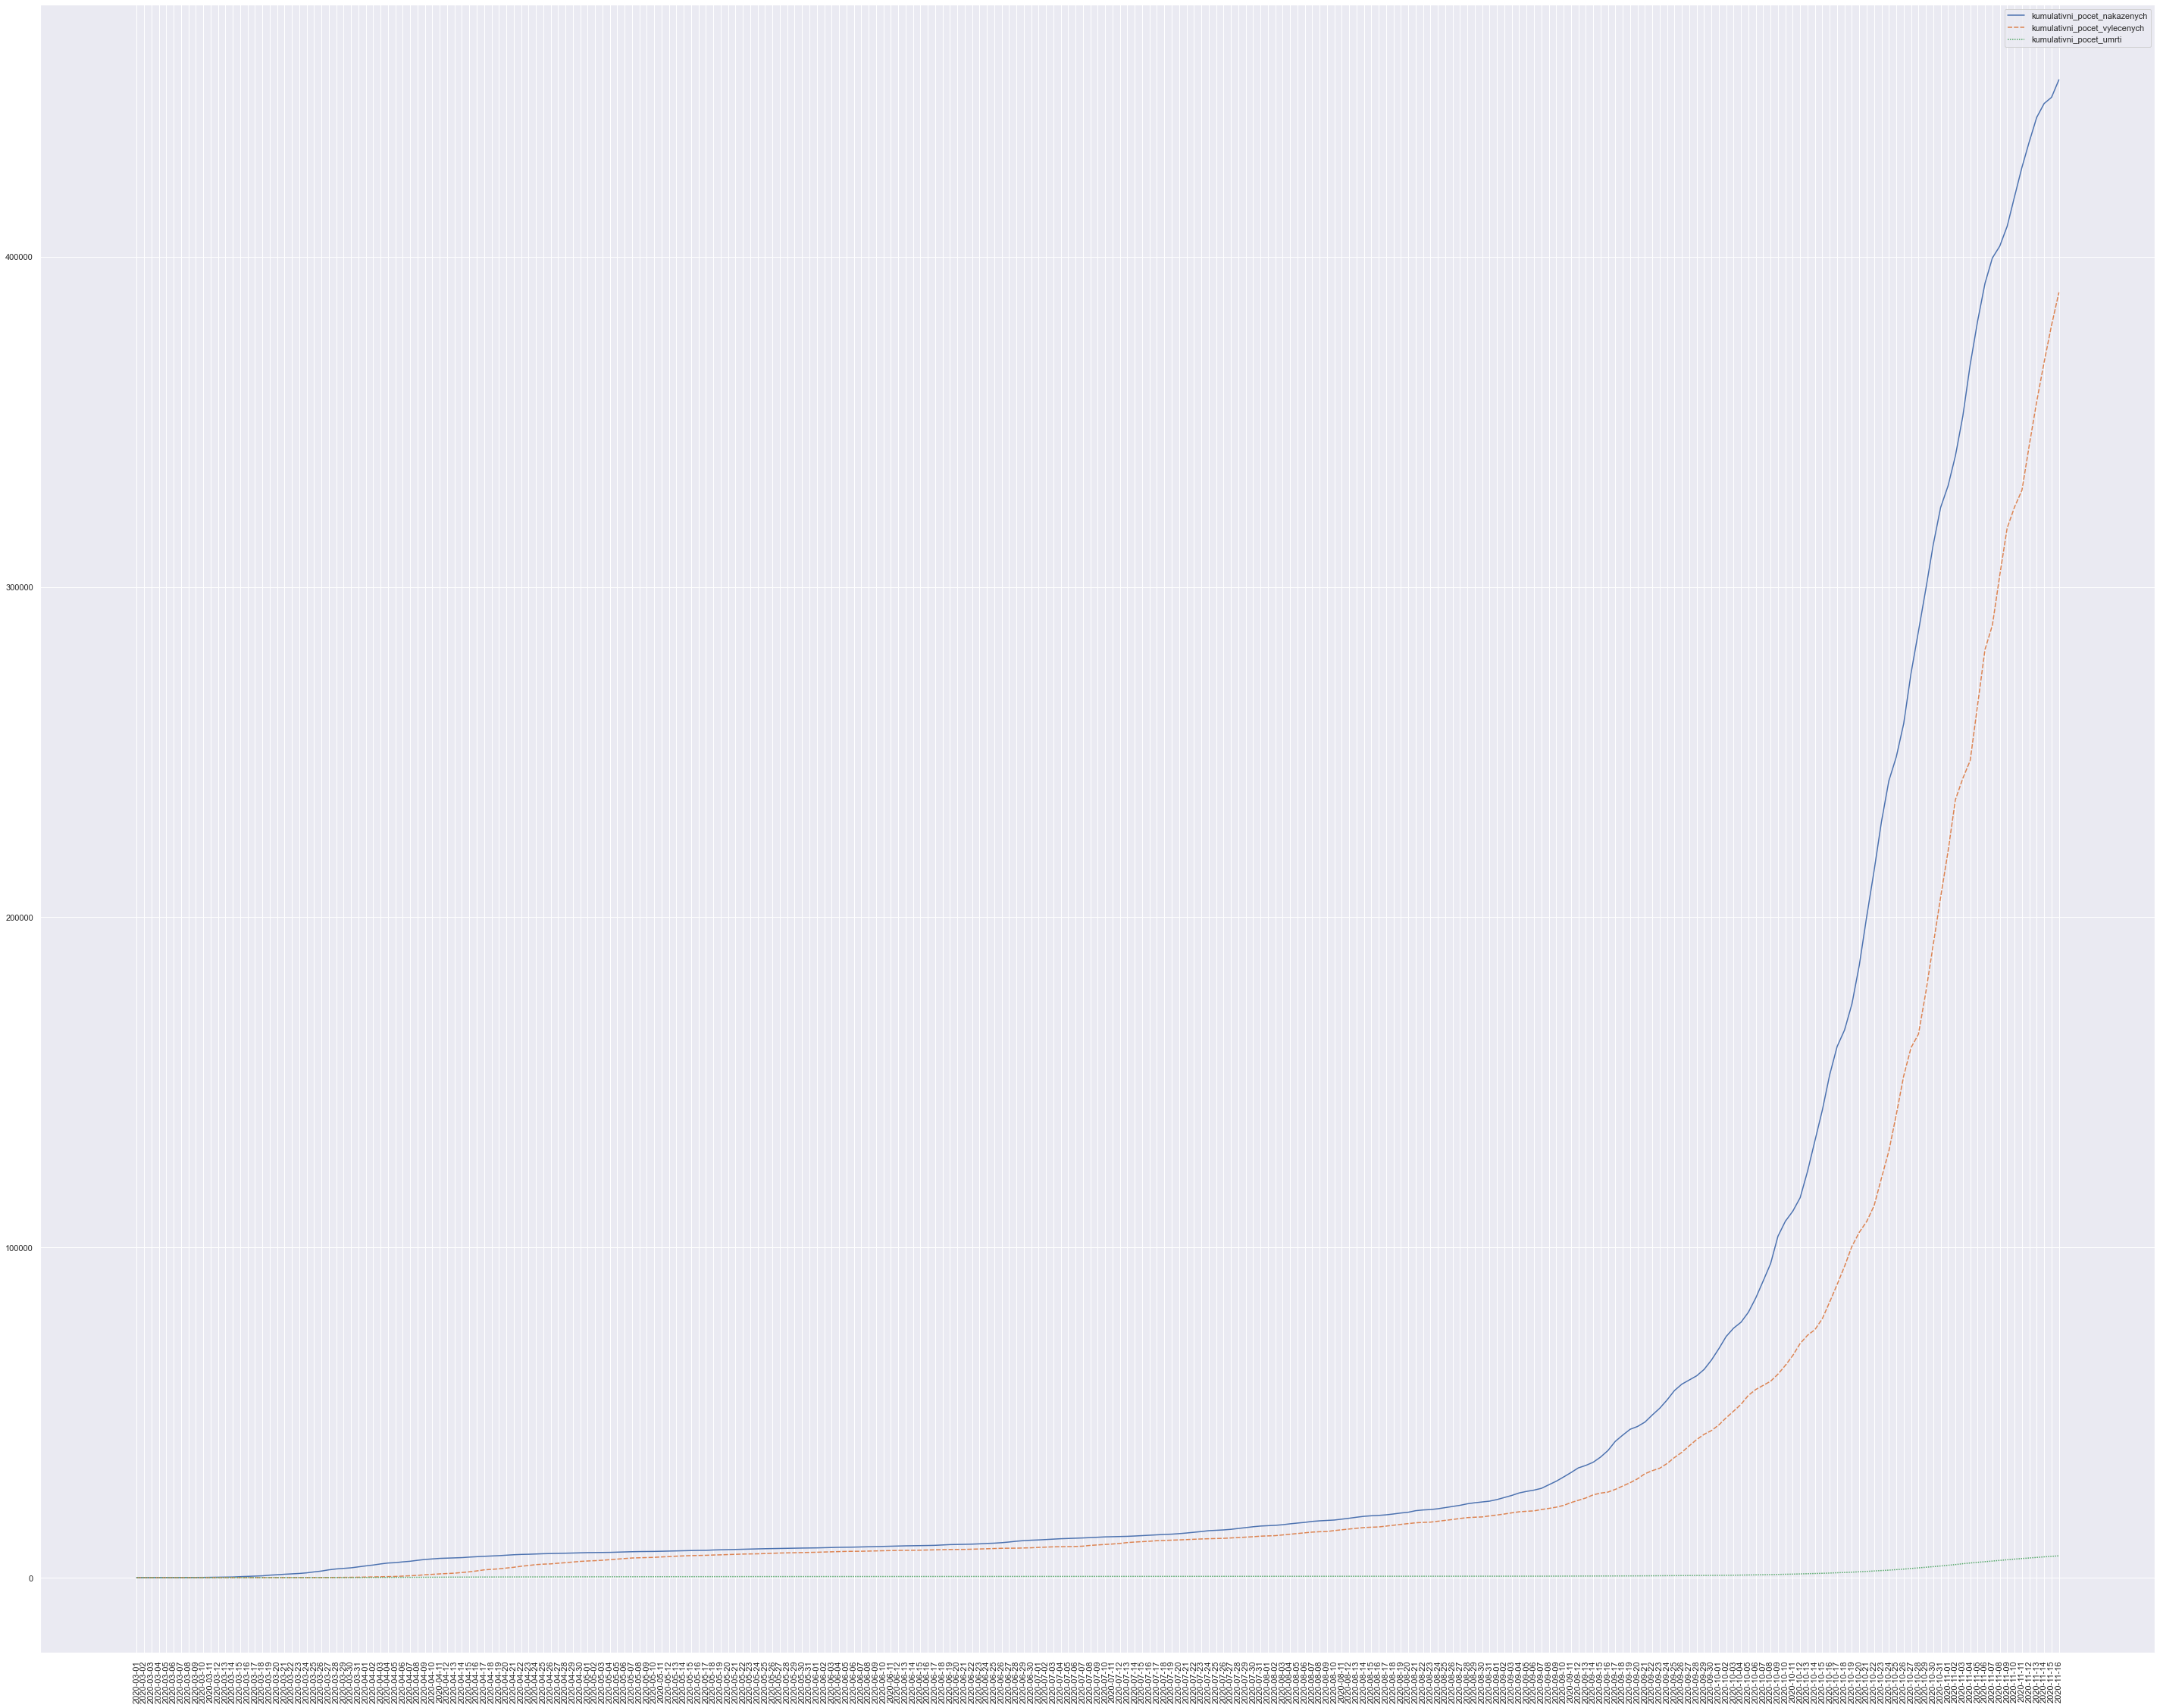

In [15]:
plt.figure(figsize=(50, 40))
lineplot = sns.lineplot(data=[nakazeny_dokopy, vylieceny_dokopy, umrti_dokopy])
for item in lineplot.get_xticklabels():
    item.set_rotation(90)

Vykreslíme si graf, ktorí nám zobrazí jednotlivé počty vyliečených, nakazených a zomrelých pre jednotlivé dni.


In [16]:
osoby = pd.read_csv('covid_cz/osoby.csv')
osoby.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,nakaza_v_zahranici,nakaza_zeme_csu_kod
0,2020-10-21,43,M,CZ010,CZ0100,NaN,NaN
1,2020-10-05,27,M,CZ010,CZ0100,NaN,NaN
2,2020-10-13,55,Z,CZ053,CZ0533,NaN,NaN
3,2020-10-22,40,M,CZ063,CZ0634,NaN,NaN
4,2020-10-26,46,M,CZ063,CZ0635,NaN,NaN


Chceme sa pozrieť ako vyzerá dataset osoby. Pomocou príkazu head zobrazíme prvých 5 záznamov.


In [17]:
osoby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487519 entries, 0 to 487518
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   datum                487519 non-null  object 
 1   vek                  487519 non-null  int64  
 2   pohlavi              487519 non-null  object 
 3   kraj_nuts_kod        487519 non-null  object 
 4   okres_lau_kod        487519 non-null  object 
 5   nakaza_v_zahranici   5658 non-null    float64
 6   nakaza_zeme_csu_kod  5661 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.0+ MB


Zobrazíme si informácie o datasete, pomocou príkazu info. Vidíme, že atribúty datum, pohlavi, kraj_nuts_kod, okres_lau_kod, nakaza_zeme_csu_kod sú typu object. Atribút vek je typu int a atribút nakaza_v_zahranici je typu float.


In [18]:
osoby.describe()

,vek,nakaza_v_zahranici
count,487519.000000,5658.0
mean,43.834015,1.0
std,20.301954,0.0
min,0.000000,1.0
25%,29.000000,1.0
50%,44.000000,1.0
75%,57.000000,1.0
max,120.000000,1.0


Pre podrobnejsie štatistiky zavoláme príkaz describe, kde sa pozrieme na medián, počet, priemer…


In [19]:
osoby.describe(include=['object'], exclude=['int64', 'float64'])

,datum,pohlavi,kraj_nuts_kod,okres_lau_kod,nakaza_zeme_csu_kod
count,487519,487519,487519,487519,5661
unique,267,2,15,78,101
top,2020-11-04,Z,CZ020,CZ0100,UA
freq,15632,255135,62390,55860,1516


Pozrieme sa na počet unikátnych hodnôt a zistíme, ktoré sú najčastejšie sa vyskutujúce hodnoty a ich počet.


In [20]:
osoby.isnull().sum()

datum                       0
vek                         0
pohlavi                     0
kraj_nuts_kod               0
okres_lau_kod               0
nakaza_v_zahranici     481861
nakaza_zeme_csu_kod    481858
dtype: int64

Pozrieme sa na počet chýbajúcich hodnôt v tomto datasete. Môžeme vidieť, že pri atribúte nakaza_v_zahranici chýba 481861 a pri atribúte nakaza_zeme_csu_kod chýba 481858 hodnôt.


In [21]:
osoby.drop(columns=['nakaza_v_zahranici', 'nakaza_zeme_csu_kod'], inplace=True)
osoby.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
0,2020-10-21,43,M,CZ010,CZ0100
1,2020-10-05,27,M,CZ010,CZ0100
2,2020-10-13,55,Z,CZ053,CZ0533
3,2020-10-22,40,M,CZ063,CZ0634
4,2020-10-26,46,M,CZ063,CZ0635


Odstránime tieto záznami z datasetu, nakoľko tieto atribúty sú pre prácu so získaným datasetom zbytočné.


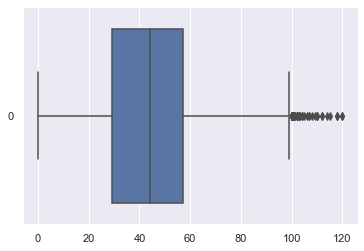

In [22]:
sns.boxplot(data=osoby['vek'], orient='h')

Pomocou boxplotu sa pozrieme na vek nakazených ľudí. Môžeme vidieť, že v súbore údajov budú aj nejaký outlyeri, nakoľko je tu dosť ľudí starších ako 100 rokov.


In [23]:
osoby['pohlavi'].value_counts()

Z    255135
M    232384
Name: pohlavi, dtype: int64

Pozrieme sa na zaskúpenie mužov a žien v datasete

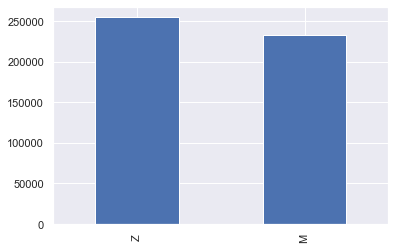

In [24]:
osoby['pohlavi'].value_counts().plot.bar()

Následne si pre lepšie porovnanie tieto počty vyzualizujeme.

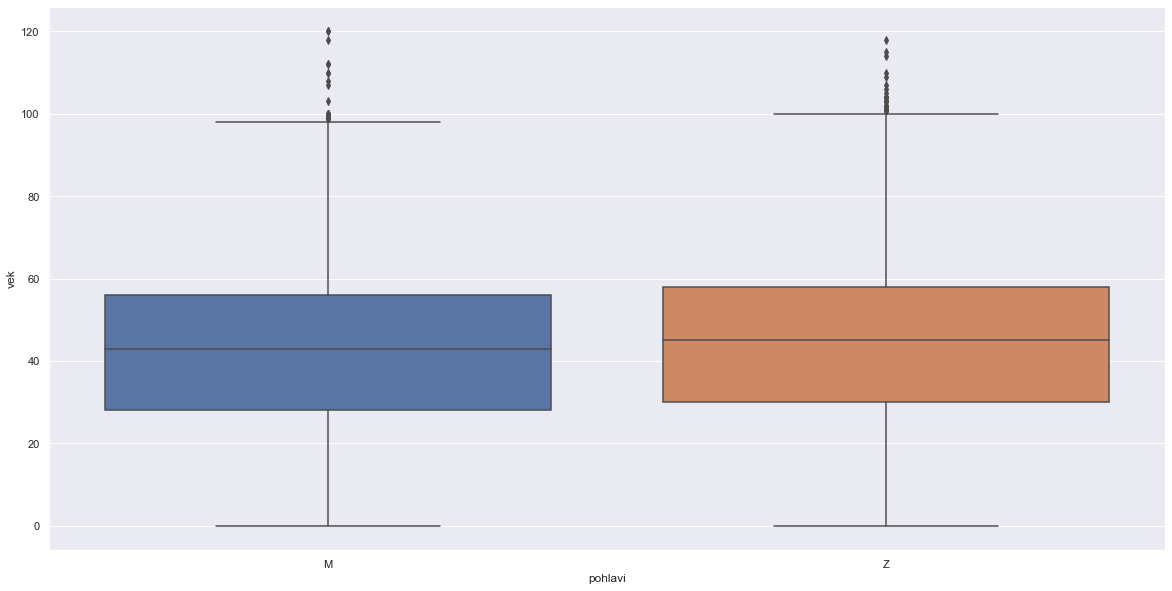

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=osoby['pohlavi'], y=osoby['vek'])

pozrieme sa aké máme vekové zaskúpenie pre jednotlivé pohlavia, vidíme, že medián je pri mužoch na nižšej hodnote, teda vzorka žien bola o niečo staršia.


In [26]:
vylieceny = pd.read_csv('covid_cz/vyleceni.csv')
vylieceny.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
0,2019-10-23,43,Z,CZ032,CZ0325
1,2020-03-14,39,Z,CZ020,CZ020A
2,2020-03-15,21,Z,CZ010,CZ0100
3,2020-03-15,49,M,CZ042,CZ0421
4,2020-03-15,18,Z,CZ042,CZ0421


Načítame si dataset vyliečených ľudí.

In [27]:
vylieceny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353770 entries, 0 to 353769
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   datum          353770 non-null  object
 1   vek            353770 non-null  int64 
 2   pohlavi        353770 non-null  object
 3   kraj_nuts_kod  353770 non-null  object
 4   okres_lau_kod  353770 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.5+ MB


Pozrieme sa na základné informácie, vidíme že atribúty datum, pohlavi, kraj_nuts_kod, okres_lau_kod sú typu object, atribút vek je typu int.


In [28]:
vylieceny.describe()

,vek
count,353770.000000
mean,42.322679
std,19.334061
min,0.000000
25%,28.000000
50%,43.000000
75%,55.000000
max,220.000000


Zobrazíme si základne štatistiky - priemer, medián, kvartily a počet.

In [29]:
vylieceny.describe(include=['object'], exclude=['int64'])

,datum,pohlavi,kraj_nuts_kod,okres_lau_kod
count,353770,353770,353770,353770
unique,244,2,14,78
top,2020-11-05,Z,CZ020,CZ0100
freq,16860,184296,47635,45944


Následne zobrazíme jednotlivé počty, počet jedinečných hodnôt v datasete a najčastejšie sa vyskytujúce hodnoty s počtom ich výskytov.


In [30]:
vylieceny.isnull().sum()

datum            0
vek              0
pohlavi          0
kraj_nuts_kod    0
okres_lau_kod    0
dtype: int64

Zobrazime si počty chýbajúcich hodnôt. Z výpisu môžeme vidieť, že nechýbajú žiadne hodnoty


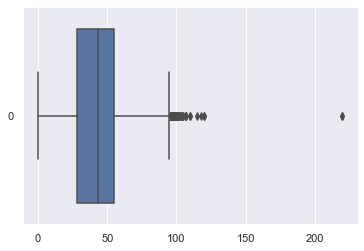

In [31]:
sns.boxplot(data=vylieceny['vek'], orient='h')

Zobrazíme si vek vyliečených ľudí pomocou boxplotu. Zneho môžeme vidieť, že určite sú tu nejaký outlyeri, nakoľko je tu pomerne veľa záznamov nad 100 rokov a 1 záznam je väčší ako 200 rokov.


In [32]:
vylieceny['pohlavi'].value_counts()

Z    184296
M    169474
Name: pohlavi, dtype: int64

Pozrieme sa na zastúpenie pohlavia pri výliečených

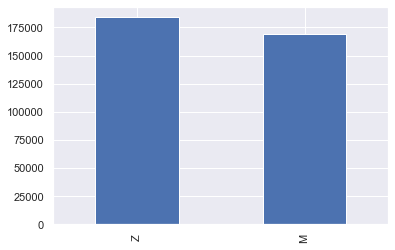

In [33]:
vylieceny['pohlavi'].value_counts().plot.bar()

Tieto počty si vyzualizujeme, môžeme vidieť, že počet žien je väčší.


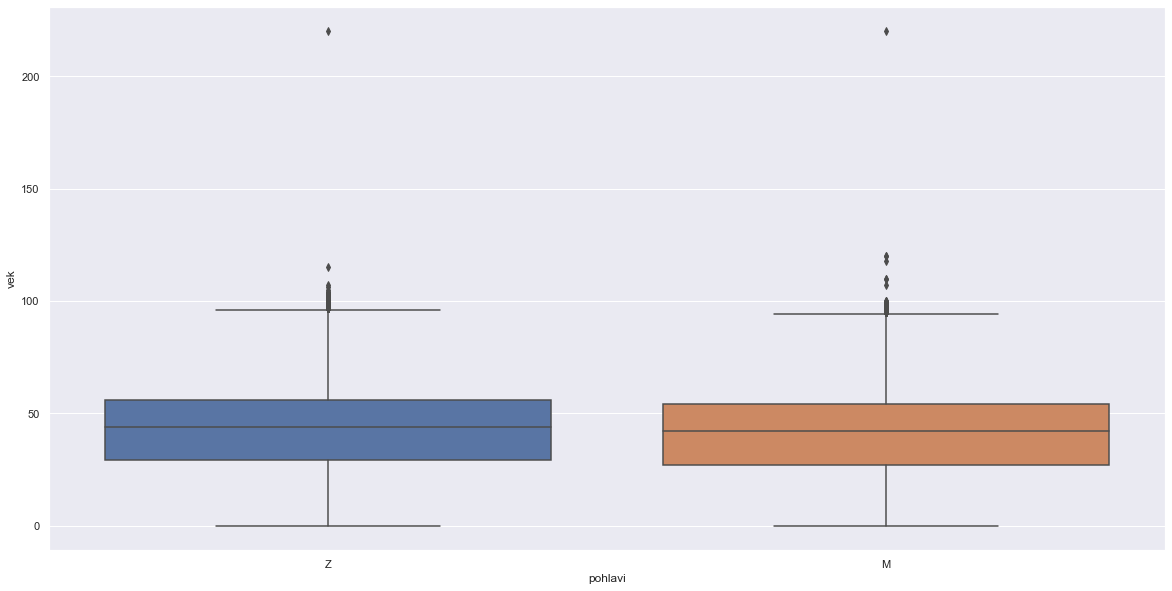

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=vylieceny['pohlavi'], y=vylieceny['vek'])

Vek vyliečených porovnáme na základe pohlaví pomocou boxplotu. Môžeme vidieť že medián je tesne pod 50 rokmi a whistlery ukazujúce 75% kvartil  sa pohybujú okolo veku 100. 


In [35]:
umrti = pd.read_csv('covid_cz/umrti.csv')
umrti.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
0,2020-03-22,94,M,CZ010,CZ0100
1,2020-03-24,73,Z,CZ010,CZ0100
2,2020-03-24,44,M,CZ080,CZ0802
3,2020-03-25,80,M,CZ071,CZ0712
4,2020-03-25,74,M,CZ010,CZ0100


Načítame si zoznam zomrelých ľudí

In [36]:
umrti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   datum          6416 non-null   object
 1   vek            6416 non-null   int64 
 2   pohlavi        6416 non-null   object
 3   kraj_nuts_kod  6416 non-null   object
 4   okres_lau_kod  6416 non-null   object
dtypes: int64(1), object(4)
memory usage: 250.8+ KB


Vypíšeme si základne info o nich, môžeme vidieť že atribúty datum, pohlavi, kraj_nuts_kod, okres_lau_kod sú typu object. Atribút vek je typu int64. Počet záznamov je 6416.


In [37]:
umrti.describe()

,vek
count,6416.000000
mean,78.701216
std,10.096311
min,16.000000
25%,73.000000
50%,80.000000
75%,86.000000
max,104.000000


Zobrazíme si podrobnejšiu štatistiku, kde môžeme vidieť hodnoty ktoré nadobúda medián, priemer…


In [38]:
umrti.describe(include=['object'], exclude=['int64'])

,datum,pohlavi,kraj_nuts_kod,okres_lau_kod
count,6416,6416,6416,6416
unique,205,2,14,77
top,2020-11-03,M,CZ064,CZ0100
freq,256,3707,800,616


Pozrieme sa na počet unikátnych hodnôt a najčastejšie sa vyskytujúce hodnoty s ich počtami pre tento dataset.

In [39]:
umrti.isnull().sum()

datum            0
vek              0
pohlavi          0
kraj_nuts_kod    0
okres_lau_kod    0
dtype: int64

Vypíšeme si počet chýbajúcich hodnôt, Môžeme vidieť že pre tento dataset je to v každom atribúte 0.


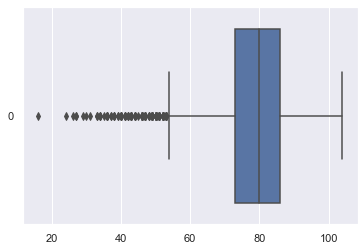

In [40]:
sns.boxplot(data=umrti['vek'], orient='h')

Pozrieme sa na vek zomrelých pre tento dataset. Môžeme vidieť, že vek zomrelých je väčší ako v predchádzjúcich datasetoch. Medián ukazuje hodnotu 80. 


In [41]:
umrti['pohlavi'].value_counts()

M    3707
Z    2709
Name: pohlavi, dtype: int64

Pozrieme sa na zastúpenie pohlaví pre tento dataset.

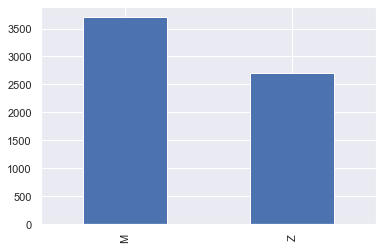

In [42]:
umrti['pohlavi'].value_counts().plot.bar()

Počet pohlaví si vyzualizujeme pomocou barplotu. Môžeme vidieť, že počet mužov je väčší v porovnaní so ženami.


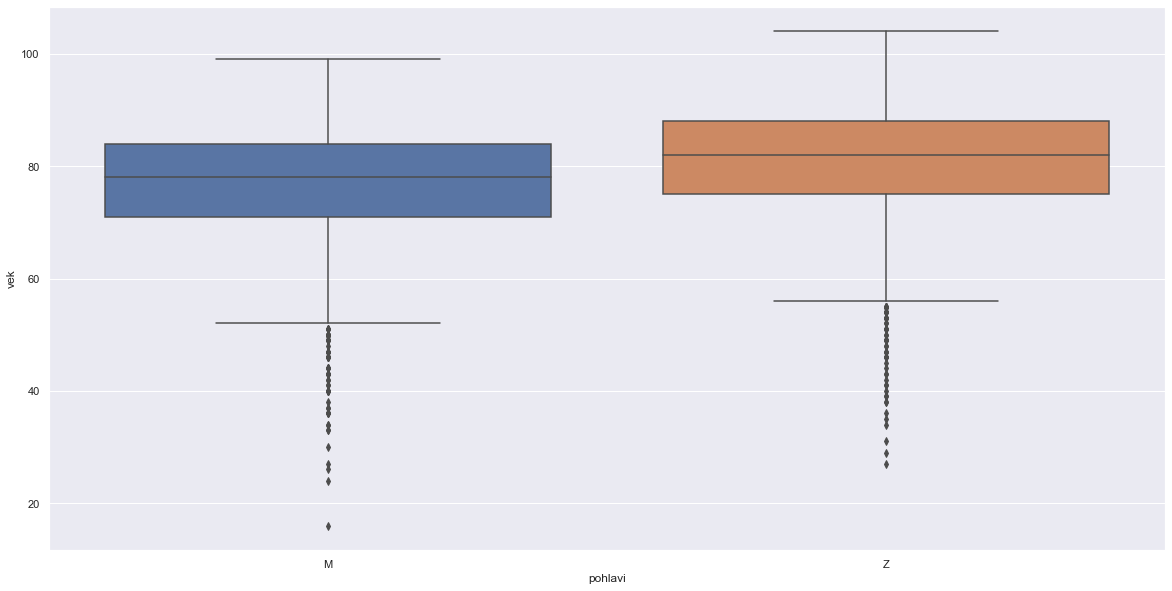

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=umrti['pohlavi'], y=umrti['vek'])

Vek si vizualizujeme aj na základe pohlaví pomocou boxplotov. Vidíme že medián zomrelých žien je o niečo vyšší ako medián zomrelých mužov.


In [45]:
def find_record(row):
    tmp = kraj_okres[(kraj_okres['datum'] == row['datum']) & (kraj_okres['kraj_nuts_kod'] == row['kraj_nuts_kod']) & (kraj_okres['okres_lau_kod'] == row['okres_lau_kod'])]
    
    if tmp.shape[0] == 0:
        return -1
    else:
        return tmp.index[0]

In [47]:
umrti['cudzi_kluc'] = umrti.apply(find_record, axis=1)
umrti.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,2020-03-22,94,M,CZ010,CZ0100,1617
1,2020-03-24,73,Z,CZ010,CZ0100,1771
2,2020-03-24,44,M,CZ080,CZ0802,1843
3,2020-03-25,80,M,CZ071,CZ0712,1911
4,2020-03-25,74,M,CZ010,CZ0100,1848


In [48]:
vylieceny['cudzi_kluc'] = vylieceny.apply(find_record, axis=1)
vylieceny.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,2019-10-23,43,Z,CZ032,CZ0325,-1
1,2020-03-14,39,Z,CZ020,CZ020A,1002
2,2020-03-15,21,Z,CZ010,CZ0100,1078
3,2020-03-15,49,M,CZ042,CZ0421,1108
4,2020-03-15,18,Z,CZ042,CZ0421,1108


In [49]:
osoby['cudzi_kluc'] = osoby.apply(find_record, axis=1)
osoby.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,2020-10-21,43,M,CZ010,CZ0100,18018
1,2020-10-05,27,M,CZ010,CZ0100,16786
2,2020-10-13,55,Z,CZ053,CZ0533,17450
3,2020-10-22,40,M,CZ063,CZ0634,18148
4,2020-10-26,46,M,CZ063,CZ0635,18457


In [50]:
osoby[osoby['cudzi_kluc'] == -1]

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
30,2020-11-24,40,Z,CZ041,CZ0412,-1
36,2020-10-14,38,M,CZ010,CZ0634,-1
38,2020-10-13,33,M,CZ010,CZ0412,-1
61,2020-10-15,29,Z,CZ010,CZ0427,-1
73,2020-11-17,71,M,CZ072,CZ0724,-1
...,...,...,...,...,...,...
487464,2020-11-21,68,Z,CZ080,CZ0804,-1
487472,2020-11-19,24,Z,CZ053,CZ0531,-1
487481,2020-11-23,48,M,CZ042,CZ0427,-1
487490,2020-11-18,81,Z,CZ064,CZ0642,-1


In [52]:
vylieceny[vylieceny['cudzi_kluc'] == -1]

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,2019-10-23,43,Z,CZ032,CZ0325,-1
8546,2020-06-21,46,M,CZ080,CZ099Y,-1
8646,2020-06-23,54,Z,CZ080,CZ099Y,-1
8796,2020-06-25,64,M,CZ080,CZ099Y,-1
8834,2020-06-26,51,M,CZ080,CZ099Y,-1
8877,2020-06-26,27,M,CZ080,CZ099Y,-1
9277,2020-07-03,62,Z,CZ080,CZ099Y,-1
9283,2020-07-03,24,Z,CZ080,CZ099Y,-1
9325,2020-07-03,39,Z,CZ080,CZ099Y,-1
9725,2020-07-08,41,M,CZ080,CZ099Y,-1


In [53]:
umrti[umrti['cudzi_kluc'] == -1]

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc


In [55]:
osoby.drop(index=osoby.index[osoby['cudzi_kluc'] == -1], inplace=True)
osoby.reset_index(inplace=True)
osoby

,index,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,0,2020-10-21,43,M,CZ010,CZ0100,18018
1,1,2020-10-05,27,M,CZ010,CZ0100,16786
2,2,2020-10-13,55,Z,CZ053,CZ0533,17450
3,3,2020-10-22,40,M,CZ063,CZ0634,18148
4,4,2020-10-26,46,M,CZ063,CZ0635,18457
...,...,...,...,...,...,...,...
441352,487514,2020-09-21,38,M,CZ042,CZ0421,15738
441353,487515,2020-11-11,89,M,CZ010,CZ0100,19635
441354,487516,2020-10-26,24,M,CZ042,CZ0424,18436
441355,487517,2020-10-24,13,M,CZ080,CZ0803,18322


In [56]:
vylieceny.drop(index=vylieceny.index[vylieceny['cudzi_kluc'] == -1], inplace=True)
vylieceny.reset_index(inplace=True)
vylieceny

,index,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,1,2020-03-14,39,Z,CZ020,CZ020A,1002
1,2,2020-03-15,21,Z,CZ010,CZ0100,1078
2,3,2020-03-15,49,M,CZ042,CZ0421,1108
3,4,2020-03-15,18,Z,CZ042,CZ0421,1108
4,5,2020-03-15,53,Z,CZ042,CZ0421,1108
...,...,...,...,...,...,...,...
353749,353765,2020-11-15,61,Z,CZ020,CZ0201,19947
353750,353766,2020-11-15,84,M,CZ053,CZ0534,19992
353751,353767,2020-11-15,46,M,CZ072,CZ0722,20011
353752,353768,2020-11-15,37,M,CZ053,CZ0534,19992


In [57]:
umrti.insert(loc=0, column='index', value=umrti.index)

In [58]:
umrti

,index,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod,cudzi_kluc
0,0,2020-03-22,94,M,CZ010,CZ0100,1617
1,1,2020-03-24,73,Z,CZ010,CZ0100,1771
2,2,2020-03-24,44,M,CZ080,CZ0802,1843
3,3,2020-03-25,80,M,CZ071,CZ0712,1911
4,4,2020-03-25,74,M,CZ010,CZ0100,1848
...,...,...,...,...,...,...,...
6411,6411,2020-11-15,77,Z,CZ041,CZ0411,19970
6412,6412,2020-11-15,84,M,CZ080,CZ0806,20019
6413,6413,2020-11-15,80,Z,CZ064,CZ0642,19999
6414,6414,2020-11-15,94,Z,CZ042,CZ0426,19978


In [60]:
kraj_okres.insert(loc=0, column='index', value=kraj_okres.index)
kraj_okres

,index,datum,kraj_nuts_kod,okres_lau_kod,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti
0,0,2020-03-01,CZ010,CZ0100,2,0,0
1,1,2020-03-01,CZ020,CZ020A,0,0,0
2,2,2020-03-01,CZ020,CZ020B,0,0,0
3,3,2020-03-01,CZ020,CZ020C,0,0,0
4,4,2020-03-01,CZ020,CZ0201,0,0,0
...,...,...,...,...,...,...,...
20092,20092,2020-11-16,CZ080,CZ0802,9853,8410,158
20093,20093,2020-11-16,CZ080,CZ0803,10220,8397,116
20094,20094,2020-11-16,CZ080,CZ0804,5991,4981,64
20095,20095,2020-11-16,CZ080,CZ0805,8666,7107,110


In [61]:
kraj_okres.to_csv('covid_cz/kraj-okres-nakazeni-vyleceni-umrti_v2.csv', index=False)
osoby.to_csv('covid_cz/osoby_v2.csv', index=False)
vylieceny.to_csv('covid_cz/vyleceni_v2.csv', index=False)
umrti.to_csv('covid_cz/umrti_v2.csv', index=False)

In [13]:
tmp = pd.read_csv('covid_cz/kraj-okres-nakazeni-vyleceni-umrti_v2.csv')
kraje = tmp['kraj_nuts_kod'].unique()
kraje

array(['CZ010', 'CZ020', 'CZ031', 'CZ032', 'CZ041', 'CZ042', 'CZ051',
       'CZ052', 'CZ053', 'CZ063', 'CZ064', 'CZ071', 'CZ072', 'CZ080'],
      dtype=object)

In [14]:
suradnice = pd.DataFrame({'kraj': ['CZ010', 'CZ020', 'CZ031', 'CZ032', 'CZ041', 'CZ042', 'CZ051', 'CZ052', 'CZ053', 'CZ063', 'CZ064', 'CZ071', 'CZ072', 'CZ080'],
                          'x': [50.0755, 49.8782, 48.9458, 49.4135, 50.1435, 50.6119, 50.6594, 50.3512, 49.9444, 49.4490, 48.9545, 49.6587, 49.2162, 49.7305],
                          'y': [14.4378, 14.9363, 14.4416, 13.3157, 12.7502, 13.7870, 14.7632, 15.7976, 16.2857, 15.6406, 16.7677, 17.0811, 17.7720, 18.2333]
                         })
suradnice

,kraj,x,y
0,CZ010,50.0755,14.4378
1,CZ020,49.8782,14.9363
2,CZ031,48.9458,14.4416
3,CZ032,49.4135,13.3157
4,CZ041,50.1435,12.7502
5,CZ042,50.6119,13.7870
6,CZ051,50.6594,14.7632
7,CZ052,50.3512,15.7976
8,CZ053,49.9444,16.2857
9,CZ063,49.4490,15.6406


In [15]:
suradnice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kraj    14 non-null     object 
 1   x       14 non-null     float64
 2   y       14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 464.0+ bytes


In [16]:
kraj_okres_v2 = pd.read_csv('covid_cz/kraj-okres-nakazeni-vyleceni-umrti_v2.csv')
osoby_v2 = pd.read_csv('covid_cz/osoby_v2.csv')
vylieceny_v2 = pd.read_csv('covid_cz/vyleceni_v2.csv')
umrti_v2 = pd.read_csv('covid_cz/umrti_v2.csv')

In [17]:
suradnice.to_csv('covid_cz/suradnice_krajov.csv')

In [29]:
kraj_okres_v2['x'] = 0.0
kraj_okres_v2['y'] = 0.0

for kraj in kraje:
    kraj_okres_v2.loc[kraj_okres_v2['kraj_nuts_kod'] == kraj, 'x'] = suradnice.loc[suradnice['kraj'] == kraj, 'x'].tolist()[0]
    kraj_okres_v2.loc[kraj_okres_v2['kraj_nuts_kod'] == kraj, 'y'] = suradnice.loc[suradnice['kraj'] == kraj, 'y'].tolist()[0]
    
kraj_okres_v2

,index,datum,kraj_nuts_kod,okres_lau_kod,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,x,y
0,0,2020-03-01,CZ010,CZ0100,2,0,0,50.0755,14.4378
1,1,2020-03-01,CZ020,CZ020A,0,0,0,49.8782,14.9363
2,2,2020-03-01,CZ020,CZ020B,0,0,0,49.8782,14.9363
3,3,2020-03-01,CZ020,CZ020C,0,0,0,49.8782,14.9363
4,4,2020-03-01,CZ020,CZ0201,0,0,0,49.8782,14.9363
...,...,...,...,...,...,...,...,...,...
20092,20092,2020-11-16,CZ080,CZ0802,9853,8410,158,49.7305,18.2333
20093,20093,2020-11-16,CZ080,CZ0803,10220,8397,116,49.7305,18.2333
20094,20094,2020-11-16,CZ080,CZ0804,5991,4981,64,49.7305,18.2333
20095,20095,2020-11-16,CZ080,CZ0805,8666,7107,110,49.7305,18.2333


In [30]:
kraj_okres_v2.to_csv('covid_cz/kraj-okres-nakazeni-vyleceni-umrti_v2.csv', index=False)

In [4]:
suradnice = pd.read_csv('covid_cz/suradnice_krajov.csv')
suradnice.drop(columns=['Unnamed: 0'], inplace=True)
suradnice

,kraj,x,y
0,CZ010,50.0755,14.4378
1,CZ020,49.8782,14.9363
2,CZ031,48.9458,14.4416
3,CZ032,49.4135,13.3157
4,CZ041,50.1435,12.7502
5,CZ042,50.6119,13.7870
6,CZ051,50.6594,14.7632
7,CZ052,50.3512,15.7976
8,CZ053,49.9444,16.2857
9,CZ063,49.4490,15.6406


In [5]:
suradnice.insert(loc=len(suradnice.columns), column='nazov', value=['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj', 'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj', 'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj', 'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj', 'Zlínský kraj', 'Moravskoslezský kraj'])
suradnice

,kraj,x,y,nazov
0,CZ010,50.0755,14.4378,Hlavní město Praha
1,CZ020,49.8782,14.9363,Středočeský kraj
2,CZ031,48.9458,14.4416,Jihočeský kraj
3,CZ032,49.4135,13.3157,Plzeňský kraj
4,CZ041,50.1435,12.7502,Karlovarský kraj
5,CZ042,50.6119,13.7870,Ústecký kraj
6,CZ051,50.6594,14.7632,Liberecký kraj
7,CZ052,50.3512,15.7976,Královéhradecký kraj
8,CZ053,49.9444,16.2857,Pardubický kraj
9,CZ063,49.4490,15.6406,Kraj Vysočina


In [6]:
suradnice.to_csv('covid_cz/suradnice_krajov.csv')